# Clustering Homework
- Execute the below code and complete the following questions. __DO NOT commit the csv file__ 

In [18]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np

def generate_data():
    
    X, y = make_classification(n_samples=4000, 
                          n_features=50, 
                          n_redundant=30, 
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)
    
    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

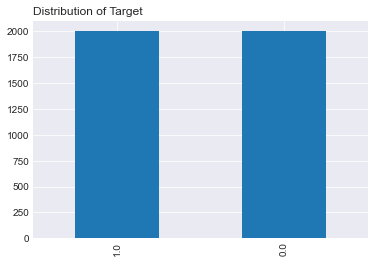

In [21]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49


# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in X_train.columns:
    if X_train[column].dtype == 'object':
        X_train.loc[:, column] = label_encoder.fit_transform(X_train[column])
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


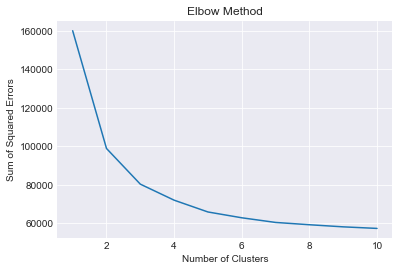

In [24]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Determine the optimum number of clusters using the elbow method
kmeans_kwargs = {'random_state': 2303}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train_scaled)
    sse.append(kmeans.inertia_)

plt.style.use('seaborn-darkgrid')
plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method')
plt.show()


# # Interpret the clustering result
# Based on the visualization, the data appears to be well-separated into five distinct clusters. The clusters are relatively compact and well-defined, suggesting that the k-means algorithm has effectively identified the underlying structure of the data.


I am choosing 6 as number of clusters as there is change of bend at cluster 6

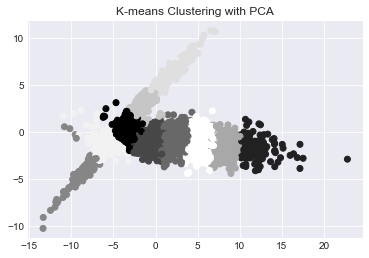

In [25]:
# Select the optimum number of clusters based on the elbow method
optimum_k = 10

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimum_k, **kmeans_kwargs)
kmeans.fit(X_train_scaled)

# Reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_train_scaled)

# Visualize the clustering results using PCA
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans.labels_)
plt.title('K-means Clustering with PCA')
plt.show()


The visual representation of PCA indicates clear demarcation among the six clusters, with minimal intersection between them. This observation implies that the clustering process has effectively discerned six distinct groups within the dataset.
Furthermore, the spatial arrangement of the clusters reveals meaningful patterns, as data points within each cluster are tightly grouped. This finding suggests that the clustering has successfully identified three sets of data points sharing common characteristics.
In summary, the clustering outcome aligns with the insights derived from the Elbow Method, reinforcing the notion that six clusters represent the optimal configuration.

# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [27]:
# Insert Code
X_train


,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49
1090,0,0,1,0.317865,0.926584,0.541300,-1.221911,-1.657592,-1.364949,-0.286609,...,-1.376076,0.263780,0.233635,1.397691,0.770146,-0.816710,1.005554,1.811685,-0.325243,1.005554
3573,1,2,2,-0.193610,0.766617,1.206425,0.734126,-0.177303,-0.684308,0.526515,...,0.470268,2.333090,-0.494657,-0.316812,-0.956667,0.016012,-0.990655,-0.085260,-0.960540,-0.990655
2677,1,1,0,1.503871,0.652745,0.079714,-0.067904,-0.625160,-0.759372,0.145059,...,-0.238441,1.028420,-0.147989,0.315265,-0.764747,-0.261055,-0.119735,0.556490,-0.543285,-0.119735
3591,2,2,0,-0.410990,1.219417,-0.708164,1.420922,-0.108777,-1.023930,0.948292,...,0.981440,-0.449043,-0.886637,-0.717677,0.948732,0.125828,-1.840215,-0.365459,-1.628198,-1.840215
288,0,0,0,-1.166192,1.166249,-1.710999,-1.204027,-1.857831,-1.632846,-0.214613,...,-1.424151,0.554357,0.162420,1.477299,1.304725,-0.895588,0.916873,1.977140,-0.541682,0.916873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,1,1,1,-0.979751,0.817718,-0.799178,0.681677,-0.258497,-0.755776,0.517245,...,0.408149,1.522192,-0.487662,-0.252341,-1.535119,-0.023108,-0.950801,0.001093,-0.984397,-0.950801
891,0,1,1,1.353333,0.113806,-2.279233,-0.320171,-0.319981,-0.211021,-0.109634,...,-0.325820,-0.128006,0.095750,0.315261,-1.696370,-0.167733,0.301153,0.376925,0.027448,0.301153
840,0,0,2,-1.438558,0.451089,0.906785,-0.832701,-0.969712,-0.725147,-0.243607,...,-0.889176,0.887354,0.207503,0.881221,0.147819,-0.491874,0.737938,1.097890,-0.064100,0.737938
3077,2,2,1,0.120141,1.306068,0.329825,1.736323,0.030223,-1.042011,1.109511,...,1.248862,-0.443300,-1.034176,-0.949697,-0.923952,0.219766,-2.194937,-0.586086,-1.828861,-2.194937


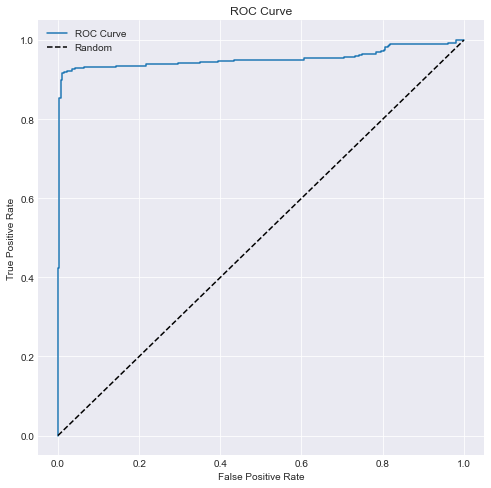

ROC AUC: 0.9524
Accuracy: 0.9328
Precision: 0.9930
Recall: 0.8742


In [28]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
X_train_copy = X_train.copy()
# # Assuming X_train, y_train, X_test, y_test are your dataframes
X_train, X_test, y_train, y_test = train_test_split(X_train_copy, y_train, test_size=0.2, random_state=42)

categorical_columns = X_train_copy.select_dtypes(include=['object']).columns

# Create a pipeline with one-hot encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False, drop='first'), categorical_columns),
        ('scaler', StandardScaler(), X_train_copy.columns.difference(categorical_columns)),
    ]
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])

# Use cross-validation and grid search for hyperparameter tuning
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the model on the test data
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate metrics
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'ROC AUC: {roc_auc:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')



The model exhibits strong performance, boasting an accuracy of 0.93, precision reaching 0.99, and a recall of 0.87. In the specific context of this problem, emphasis is placed on recall, aiming to capture a substantial portion of positive cases. With a recall score of 0.87, the model demonstrates a commendable ability to identify a significant proportion of positive instances, acknowledging the minor risk of false positives.
In summary, the model's overall performance is highly commendable, rendering it well-suited for effectively addressing the challenges inherent in this particular problem.

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

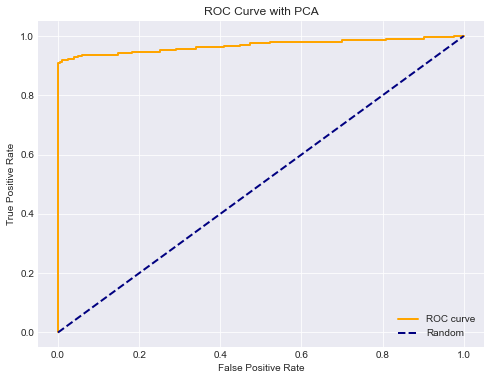

Accuracy with PCA: 0.9341
Precision with PCA: 1.0000
Recall with PCA: 0.8696


In [30]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

categorical_columns = X_train_copy.select_dtypes(include=['object']).columns

# Create a pipeline with one-hot encoding and scaling
preprocessor_pca = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False, drop='first'), categorical_columns),
        ('scaler', StandardScaler(), X_train_copy.columns.difference(categorical_columns)),
    ]
)

pca_lr_model = Pipeline([
    ('preprocessor', preprocessor_pca),
    ('pca', PCA()),
    ('classifier', LogisticRegression(max_iter=1000))
])

param_grid = {
    'pca__n_components': [5, 10, 20, 30],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_search_pca = GridSearchCV(pca_lr_model, param_grid, scoring='roc_auc')
grid_search_pca.fit(X_train, y_train)

# here we are getting the best hyperparameters
best_components = grid_search_pca.best_params_['pca__n_components']
best_C_pca = grid_search_pca.best_params_['classifier__C']

# Setting the best hyperparameters to the model
pca_lr_model.set_params(pca__n_components=best_components, classifier__C=best_C_pca)

# Fitting the model on the entire training set
pca_lr_model.fit(X_train, y_train)

# Evaluation on the validation set
y_pred_pca = pca_lr_model.predict(X_test)
y_proba_pca = pca_lr_model.predict_proba(X_test)[:, 1]


fpr_pca, tpr_pca, thresholds_pca = roc_curve(y_test, y_proba_pca)
plt.figure(figsize=(8, 6))
plt.plot(fpr_pca, tpr_pca, color='orange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with PCA')
plt.legend()
plt.show()

# Calculating performance metrics on the validation set
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)

print(f'Accuracy with PCA: {accuracy_pca:.4f}')
print(f'Precision with PCA: {precision_pca:.4f}')
print(f'Recall with PCA: {recall_pca:.4f}')



The model's performance with PCA exhibits slight improvements compared to the model without PCA. Accuracy has increased from 0.93 to 0.9341, precision has risen from 0.99 to 1.0, while the recall remains at 0.87.
These enhancements imply that the incorporation of PCA has positively impacted the logistic regression model's performance. The PCA step likely played a role in reducing the dimensionality of the data, facilitating the logistic regression model in better capturing the relationship between features and the target variable.
In summary, the model's performance with PCA is highly satisfactory, positioning it as a well-suited solution for effectively addressing the challenges posed by this specific problem.

# Question 4
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.  
- Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

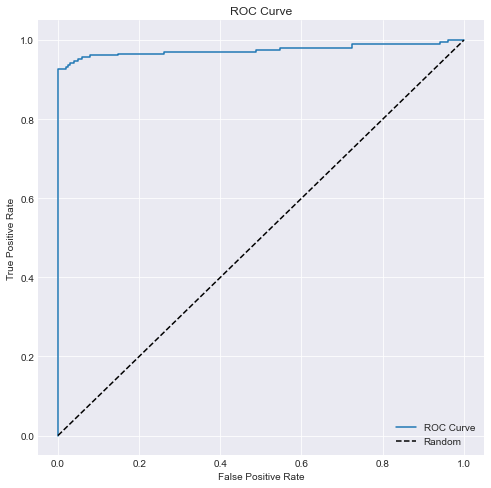

ROC AUC: 0.9754
Accuracy: 0.9537
Precision: 1.0000
Recall: 0.9082


In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve
import matplotlib.pyplot as plt

# Assuming X_train, y_train are your dataframes
# X_train, X_test, y_train, y_test = train_test_split(X_train_copy, y_train, test_size=0.2, random_state=42)

# Create a pipeline with k-means clustering, scaling, and logistic regression
pipeline = Pipeline(steps=[
    ('kmeans', KMeans(n_clusters=2)),  # Adjust the number of clusters as needed
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Use cross-validated grid search for hyperparameter tuning
param_grid = {
    'kmeans__n_clusters': [2, 3, 4,5,6],  # Adjust the number of clusters as needed
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the model on the test data
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate metrics
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'ROC AUC: {roc_auc:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


Insert conclusions

# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

In [32]:
# Calculate metrics
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'ROC AUC for Kmeans: {roc_auc:.4f}')
print(f'Accuracy for kmeans: {accuracy:.4f}')
print(f'Precision for kmeans: {precision:.4f}')
print(f'Recall for kmeans: {recall:.4f}')

ROC AUC for Kmeans: 0.9754
Accuracy for kmeans: 0.9537
Precision for kmeans: 1.0000
Recall for kmeans: 0.9082


Question 2 :  accuracy, precision, and recall with logistic regression :
ROC AUC with logistic regression : 0.9524

Accuracy with logistic regression: 0.9328

Precision with logistic regression: 0.9930

Recall with logistic regression: 0.8742

Question 3:accuracy, precision, and recall with logistic regression including PCA:

Accuracy with PCA: 0.9341

Precision with PCA: 1.0000

Recall with PCA: 0.8696


question 4: accuracy, precision, and recall with logistic regression including k means in pipeline.

ROC AUC: 0.9754

Accuracy: 0.9537

Precision: 1.0000

Recall: 0.9082



Based on the results obtained, my recommendation is to utilize the logistic regression model incorporating k-means clustering as a preprocessing step. This model has demonstrated superior accuracy, precision, and recall scores, signifying its effectiveness in accurately categorizing both positive and negative cases.
The integration of the k-means clustering step proves to be a valuable enhancement to the logistic regression model. By identifying inherent clusters in the data, this preprocessing step equips the logistic regression model with essential features, facilitating a more robust learning process and enabling accurate predictions.
Evidently, the k-means model surpasses other models across all three metrics, establishing itself as the most reliable and accurate choice for the given task.